## Installing and importing the necessary libraries.


In [35]:
#!pip install -U imbalanced-learn

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Loading the dataset

In [2]:
data=pd.read_csv('/content/drive/MyDrive/Dataset/musk_csv.csv')
data.drop('ID',axis=1,inplace=True)

In [3]:
data.shape

(6598, 169)

In [4]:
data.head()

,molecule_name,conformation_name,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15,f16,f17,f18,f19,f20,f21,f22,f23,f24,f25,f26,f27,f28,f29,f30,f31,f32,f33,f34,f35,f36,f37,f38,...,f128,f129,f130,f131,f132,f133,f134,f135,f136,f137,f138,f139,f140,f141,f142,f143,f144,f145,f146,f147,f148,f149,f150,f151,f152,f153,f154,f155,f156,f157,f158,f159,f160,f161,f162,f163,f164,f165,f166,class
0,MUSK-211,211_1+1,46,-108,-60,-69,-117,49,38,-161,-8,5,-323,-220,-113,-299,-283,-307,-31,-106,-227,-42,-59,-22,-67,189,81,17,-27,-89,-67,105,-116,124,-106,5,-120,63,-165,40,...,81,-114,-187,45,-118,-75,-182,-234,-19,12,-13,-41,-119,-149,70,17,-20,-177,-101,-116,-14,-50,24,-81,-125,-114,-44,128,3,-244,-308,52,-7,39,126,156,-50,-112,96,1
1,MUSK-211,211_1+10,41,-188,-145,22,-117,-6,57,-171,-39,-100,-319,-111,-228,-281,-281,-300,54,-149,-98,-196,-27,-22,2,75,49,-34,45,-91,32,95,-116,85,-23,42,-58,61,-171,2,...,88,-21,-32,32,-128,-72,-124,-218,-94,53,-79,-20,-35,-26,4,50,17,-177,-102,-121,-66,-77,51,-41,-34,-32,-63,115,-5,-235,-59,-2,52,103,136,169,-61,-136,79,1
2,MUSK-211,211_1+11,46,-194,-145,28,-117,73,57,-168,-39,-22,-319,-111,-104,-283,-282,-303,52,-152,-97,-225,-28,-22,2,179,49,-33,46,-88,22,79,-116,19,-11,6,-38,71,-175,3,...,64,0,-23,-15,-129,-74,-125,-221,-93,53,-72,-19,-33,-26,3,49,17,-177,-102,-119,-66,-81,51,-41,-27,-41,-140,77,-163,-238,-134,-154,57,143,142,165,-67,-145,39,1
3,MUSK-211,211_1+12,41,-188,-145,22,-117,-7,57,-170,-39,-99,-319,-111,-228,-282,-281,-301,54,-150,-98,-196,-28,-22,2,77,48,-34,46,-91,32,94,-116,84,-23,41,-58,62,-171,3,...,88,-20,-32,32,-128,-73,-125,-220,-93,53,-78,-19,-34,-26,4,50,17,-177,-101,-121,-65,-77,52,-41,-34,-32,-66,115,-7,-236,-60,-4,52,104,136,168,-60,-135,80,1
4,MUSK-211,211_1+13,41,-188,-145,22,-117,-7,57,-170,-39,-99,-319,-111,-228,-282,-281,-301,54,-150,-98,-196,-28,-22,2,78,48,-34,46,-91,31,94,-116,84,-23,41,-58,62,-171,3,...,88,-20,-32,32,-128,-73,-125,-220,-93,53,-78,-19,-34,-26,4,50,17,-177,-101,-121,-65,-76,52,-41,-34,-32,-66,115,-8,-236,-60,-4,52,104,137,168,-60,-135,80,1


## Exploratory Data Analysis

In [5]:
data.dtypes

molecule_name        object
conformation_name    object
f1                    int64
f2                    int64
f3                    int64
                      ...  
f163                  int64
f164                  int64
f165                  int64
f166                  int64
class                 int64
Length: 169, dtype: object

In [6]:
data.describe()

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15,f16,f17,f18,f19,f20,f21,f22,f23,f24,f25,f26,f27,f28,f29,f30,f31,f32,f33,f34,f35,f36,f37,f38,f39,f40,...,f128,f129,f130,f131,f132,f133,f134,f135,f136,f137,f138,f139,f140,f141,f142,f143,f144,f145,f146,f147,f148,f149,f150,f151,f152,f153,f154,f155,f156,f157,f158,f159,f160,f161,f162,f163,f164,f165,f166,class
count,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,...,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000
mean,58.945135,-119.128524,-73.146560,-0.628372,-103.533495,18.359806,-14.108821,-1.858290,-86.003031,-44.495756,-119.456502,-84.929221,-61.911185,-127.935283,-123.005153,-265.690967,-53.415732,-67.741285,-52.352531,-44.902698,-75.645953,-55.783419,-61.619127,72.506062,32.285238,-69.659139,-15.361018,-102.665959,8.520764,12.553956,-82.314186,25.436193,-34.503183,-78.915732,-73.199000,115.882995,-115.562746,-7.853289,-75.578509,12.700667,...,-19.476811,-68.070627,-94.963474,2.993786,-36.652774,-79.191422,-90.778266,-95.868142,-28.259473,-8.521067,-37.599121,-67.789330,-51.976508,-65.693089,-0.443165,1.331464,-21.754319,-165.748863,-87.364050,-113.114580,-18.523644,-41.386481,8.755077,-55.026069,-61.105335,-54.810397,-76.831161,33.209912,-61.212337,-210.975447,-184.798272,-75.795696,-26.073204,64.616702,112.037739,201.760230,-47.488330,-150.259927,41.770233,0.154138
std,53.249007,90.813375,67.956235,80.444617,64.387559,80.593655,115.315673,90.372537,108.326676,72.088903,108.911397,79.541410,61.444281,101.191126,98.009158,70.647329,117.237608,61.403085,82.503477,79.304489,75.187995,101.908604,94.524709,123.334433,108.105908,101.325550,91.621335,73.778232,63.484770,126.086157,80.225924,106.627993,57.816952,118.201270,75.350809,57.070192,104.682519,85.732778,70.534415,80.750001,...,130.607205,70.016546,98.100733,60.633027,84.316386,61.733776,68.098995,87.253395,61.664300,97.997434,77.580190,94.753428,64.344336,69.094605,82.410293,103.746483,103.113954,54.087579,51.177725,21.463582,63.048333,73.864481,83.274158,60.100098,70.788743,67.538140,76.908685,98.511502,97.547356,83.710890,107.819514,127.861271,69.727964,100.861935,72.835040,59.526751,55.069365,76.019023,94.116085,0.361108
min,-31.000000,-199.000000,-167.000000,-114.000000,-118.000000,-183.000000,-171.000000,-225.000000,-245.000000,-286.000000,-328.000000,-321.000000,-305.000000,-342.000000,-294.000000,-327.000000,-224.000000,-308.000000,-286.000000,-252.000000,-295.000000,-185.000000,-253.000000,-76.000000,-100.000000,-242.000000,-205.000000,-166.000000,-142.000000,-162.000000,-117.000000,-143.000000,-139.000000,-279.000000,-160.000000,-7.000000,-175.000000,-190.000000,-148.000000,-180.000000,...,-221.000000,-307.000000,-189.000000,-123.000000,-140.000000,-319.000000,-338.000000,-336.000000,-196.000000,-197.000000,-199.000000,-243.000000,-283.000000,-290.000000,-185.000000,-157.000000,-171.000000,-179.000000,-106.000000,-136.000000,-200.000000,-213.000000,-190.000000,-140.000000,-128.000000,-114.000000,-173.000000,-143.000000,-198.000000,-257.000000,-328.000000,-219.000000,-136.000000,-120.000000,-69.000000,73.000000,-289.000000,-428.000000,-471.000000,0.000000
25%,37.00000

##Bar plot representing molecule name and its occurrence.

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


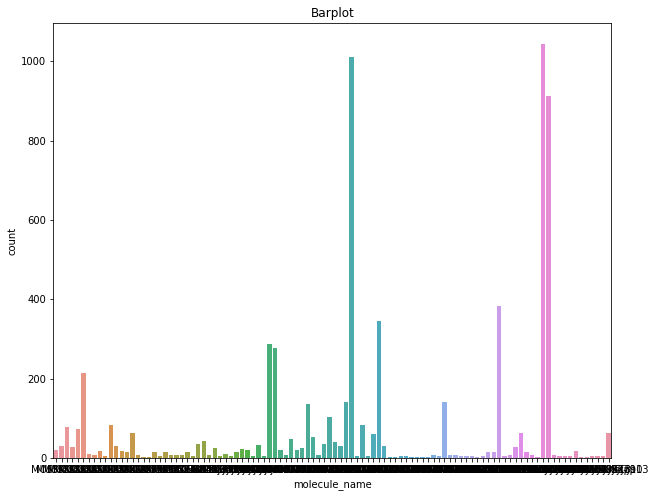

In [7]:
plt.figure(figsize=(10,8))
plt.title("Barplot")
sns.countplot(data['molecule_name'])

In [8]:
print("Number of unique molecules=",len(np.unique(data['molecule_name'])))

Number of unique molecules= 102


In [9]:
print("Class distribution")
data['class'].value_counts()

Class distribution


0    5581
1    1017
Name: class, dtype: int64

## Barplot of class distribution

Ratio of 2 classes
Class 0: 0.8459
Class 1: 0.1541


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


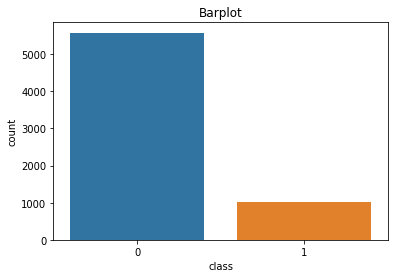

In [10]:
plt.title("Barplot",)
sns.countplot(data['class'])
count=dict(data['class'].value_counts())
print("Ratio of 2 classes")
print("Class 0:",np.round(count[0]/data.shape[0],4))
print("Class 1:",np.round(count[1]/data.shape[0],4))

##Scatter plot of class distribution

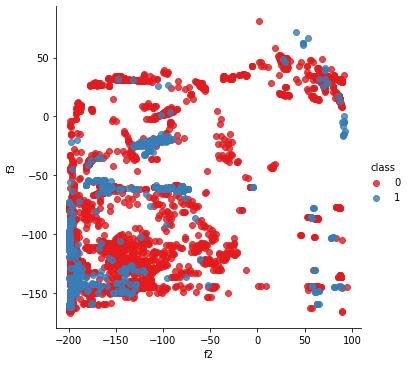

In [11]:
sns.lmplot(x='f2',y='f3',data=data,fit_reg=False,hue='class',legend=True,palette="Set1")

In [12]:
data1=data.iloc[:,2:data.shape[1]-1]
col=data1.columns

##Heatmap representing the relationship among continuous attributes

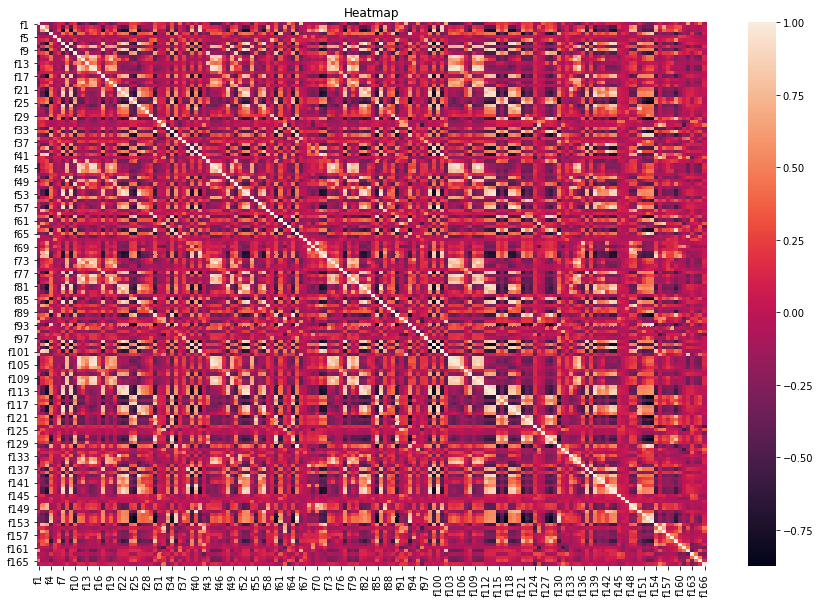

In [13]:
plt.figure(figsize=(15,10))
plt.title('Heatmap')
sns.heatmap(data1.corr())

#Preprocessing

In [14]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
scaler = StandardScaler()
scaler.fit(data1)
data1=scaler.transform(data1)

def pCA(data):
    pca = PCA(n_components=data.shape[1])
    principalComponents = pca.fit_transform(data)
    Newdata = pd.DataFrame(data = principalComponents, columns = col)
    return Newdata

data2=pCA(data1)

In [15]:
sum1=0
for i in range(1,data2.shape[1]):
    sum1=sum1+np.std(data2.iloc[:,i])**2
    perc=(sum1/117.4104304710796)*100
    print("First",i,"principal components have",np.round(perc,4),"% variation")

First 1 principal components have 25.2076 % variation
First 2 principal components have 32.1558 % variation
First 3 principal components have 38.3077 % variation
First 4 principal components have 43.1792 % variation
First 5 principal components have 47.6535 % variation
First 6 principal components have 51.7907 % variation
First 7 principal components have 55.5904 % variation
First 8 principal components have 59.0189 % variation
First 9 principal components have 62.3369 % variation
First 10 principal components have 64.9959 % variation
First 11 principal components have 67.5309 % variation
First 12 principal components have 69.747 % variation
First 13 principal components have 71.8005 % variation
First 14 principal components have 73.616 % variation
First 15 principal components have 75.3958 % variation
First 16 principal components have 76.9722 % variation
First 17 principal components have 78.4468 % variation
First 18 principal components have 79.7172 % variation
First 19 principal co

We observe the first 31 principal components have 90.1559% variation.

In [16]:
from sklearn import preprocessing
le1 = preprocessing.LabelEncoder()
le1.fit(data['conformation_name'])
val1=le1.transform(data['conformation_name'])

In [17]:
le = preprocessing.LabelEncoder()
le.fit(data['molecule_name'])
val=le.transform(data['molecule_name'])
final=pd.concat([data.iloc[:,168],data2.iloc[:,:31]],axis=1)
final['conformation_name']=val1
final['molecule_name']=val
final.head()

,class,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15,f16,f17,f18,f19,f20,f21,f22,f23,f24,f25,f26,f27,f28,f29,f30,f31,conformation_name,molecule_name
0,1,1.217220,9.430927,-2.062257,-1.184650,0.757177,-0.638690,2.620163,0.358567,1.163274,0.686518,1.125464,-2.199767,-0.805332,1.864503,0.647346,-2.371105,-0.509662,-0.526805,-1.097019,-1.075013,-0.321117,-0.208920,0.788460,-0.029561,-1.472157,-0.185562,0.680510,0.008709,-0.135617,-0.208580,0.637624,684,0
1,1,-3.282384,8.142049,-1.017105,1.234693,1.467631,-2.379757,0.394222,-0.438175,-2.677367,-0.928166,0.824188,-0.324913,1.780136,-2.049323,-1.969610,-2.544373,-1.355732,0.666122,-1.815111,0.976652,0.701382,1.066357,-0.286865,-0.002965,0.710019,-0.523486,-0.387545,-0.248005,0.409924,0.081157,-0.179794,685,0
2,1,-3.404298,7.778997,1.738739,0.958769,0.261527,-1.135047,0.039336,-0.401260,-3.004679,-1.281685,0.004501,-0.613054,0.818497,-2.135343,-1.053727,-2.565259,-0.440471,0.013134,-1.726967,0.159066,1.153950,-0.699006,-0.279154,-0.121457,0.504567,-0.273388,-0.326650,0.135953,-0.205825,0.348082,-0.353967,686,0
3,1,-3.286574,8.170463,-0.993372,1.204385,1.458170,-2.351269,0.419175,-0.435484,-2.670036,-0.912308,0.812704,-0.347750,1.781515,-2.083692,-1.941732,-2.540190,-1.374593,0.657591,-1.804178,0.977746,0.720671,1.043257,-0.318993,0.011216,0.704525,-0.518743,-0.401212,-0.243145,0.407829,0.103705,-0.181031,687,0
4,1,-3.284805,8.172113,-0.991081,1.203382,1.453172,-2.350218,0.422904,-0.431420,-2.669470,-0.907880,0.814661,-0.346279,1.779517,-2.082777,-1.941701,-2.538771,-1.375568,0.660468,-1.806806,0.976586,0.723422,1.042488,-0.324418,0.011655,0.705435,-0.520416,-0.401033,-0.242245,0.405161,0.107568,-0.182468,688,0


In [18]:
X=final.drop('class',axis=1)
y=final['class']

## Oversampling using SMOTE

In [19]:
import imblearn
over = imblearn.over_sampling.SMOTE(random_state=1,sampling_strategy=0.67)
Xn,yn=over.fit_resample(X,y)
Xn['class']=yn
Xn.shape

(9320, 34)

##Bar plot after oversampling

Ratio of 2 classes
Class 0: 0.5988
Class 1: 0.4012


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


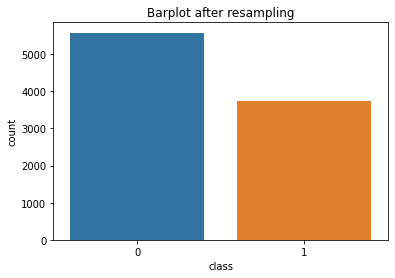

In [20]:
plt.title("Barplot after resampling",)
sns.countplot(Xn['class'])
count=dict(Xn['class'].value_counts())
print("Ratio of 2 classes")
print("Class 0:",np.round(count[0]/Xn.shape[0],4))
print("Class 1:",np.round(count[1]/Xn.shape[0],4))

##Scatter plot after oversampling

Scatter plot after SMOTE


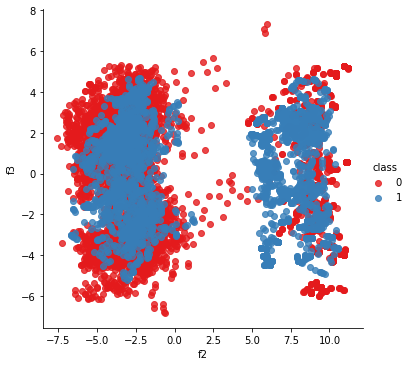

In [21]:
print("Scatter plot after SMOTE")
sns.lmplot(x='f2',y='f3',data=Xn,fit_reg=False,hue='class',legend=True,palette="Set1")

In [22]:
Xn.drop('class',axis=1,inplace=True)

In [23]:
Xn1=np.array(Xn.values)
yn1=np.array(yn)


## Train and Test split

In [24]:
from sklearn.model_selection import train_test_split 
X_train1, X_test, y_train1, y_test = train_test_split(Xn1, yn1, test_size=0.2,random_state=45)


##Modeling

In [25]:
from keras.models import Model as KerasModel
from keras.layers import Input, Dense, Activation, Reshape, Dropout
from keras.layers import Concatenate
from keras.layers.embeddings import Embedding
from keras import optimizers
from keras.callbacks import EarlyStopping
import keras.backend as K
import keras
import tensorflow as tf
from keras import Sequential

In [28]:
def split_features(X):
    X_list = []
    for i in range(33):
        X_list.append(X[:,i])
    return X_list


class NNwithEmbeddings():
    
    def __init__(self, X_train, y_train, X_val, y_val):
        super().__init__()
        self._build_model()
        
    def preprocess(self, X):
        X_list = split_features(X)
        return X_list
        
    def _build_model(self):
        i=[]
        # Continous varibles
        for j in range(32):
          inp = Input(shape=(1,))
          i.append(inp)
        # categorical variables
        inp_mol = Input(shape=(1,))
        out_mol = Embedding(101+1, 51, name='mol_embedding')(inp_mol)
        out_mol = Reshape(target_shape=(51,))(out_mol)
        out=i[:]
        i.append(inp_mol)
        out.append(out_mol)
        inp_model = i
        out_embeddings =out 
  
        out_model = Concatenate()(out_embeddings)
        ## Architecture
        out_model = Dense(32)(out_model)
        out_model = Activation('relu')(out_model)
        #out_model = Dropout(0.3)(out_model)
        out_model = Dense(16)(out_model)
        out_model = Activation('relu')(out_model)
        #out_model = Dropout(0.1)(out_model)
        out_model = Dense(1)(out_model)
        out_model=Activation('sigmoid')(out_model)
        self.model = KerasModel(inputs=inp_model, outputs=out_model)
        self.model.compile(optimizer='Adam', metrics=['accuracy'],loss=[keras.losses.binary_crossentropy])
        
    
    def fit(self, X_train, y_train, X_val, y_val):
        m=self.model.fit(self.preprocess(X_train), y_train,
                       validation_data=(self.preprocess(X_val), y_val),
                       epochs=4, batch_size=128
                   )
        self.model.save_weights('/content/drive/MyDrive/Dataset/task.h5')
        return (pd.DataFrame(m.history))
    def load(self):
      self.model.load_weights('/content/drive/MyDrive/Dataset/task.h5')
    def prediction(self, X):
        return self.model.predict(self.preprocess(X)).flatten()


In [29]:
model1=NNwithEmbeddings(X_train1,y_train1,X_test,y_test) #83 features  

In [30]:
hist=model1.fit(X_train1,y_train1,X_test,y_test)

Epoch 1/4
59/59 [==============================] - 1s 9ms/step - loss: 53.4292 - accuracy: 0.5212 - val_loss: 1.7949 - val_accuracy: 0.6803
Epoch 2/4
59/59 [==============================] - 0s 6ms/step - loss: 0.5868 - accuracy: 0.8053 - val_loss: 0.1624 - val_accuracy: 0.9447
Epoch 3/4
59/59 [==============================] - 0s 6ms/step - loss: 0.0962 - accuracy: 0.9891 - val_loss: 0.0677 - val_accuracy: 0.9920
Epoch 4/4
59/59 [==============================] - 0s 5ms/step - loss: 0.0375 - accuracy: 0.9970 - val_loss: 0.0282 - val_accuracy: 0.9968


In [31]:
model1.load()

In [32]:
hist.columns

Index(['loss', 'accuracy', 'val_loss', 'val_accuracy'], dtype='object')

##Post Visualization

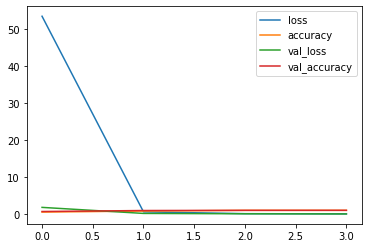

In [33]:
hist.plot.line()

###Train loss vs Validation loss

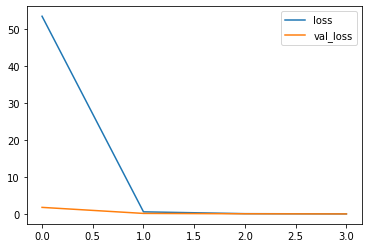

In [34]:
hist.iloc[:,[0,2]].plot.line()

### Train accuracy vs Validation accuracy

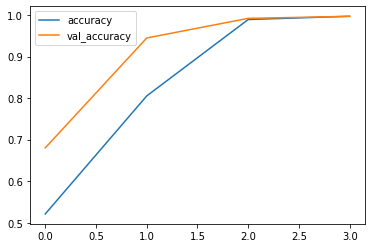

In [35]:
hist.iloc[:,[1,3]].plot.line()

##Evaluation


In [40]:
from sklearn.metrics import f1_score,accuracy_score,precision_score,recall_score
pred=model1.prediction(X_test)


In [41]:
pred[pred>0.5]=1
pred[pred<=0.5]=0
pred

array([0., 0., 1., ..., 0., 0., 0.], dtype=float32)

In [42]:
f1_score(y_test,pred)

0.9958734525447043

In [43]:
accuracy_score(y_test,pred)

0.9967811158798283

In [44]:
precision_score(y_test,pred)

0.9917808219178083

In [45]:
recall_score(y_test,pred)

1.0